In [1]:
from fastai.data.all import *
from fastai.vision.all import *
import fastai
import pandas as pd
import statistics
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ArtEmisv1.csv')
df

,art_style,painting,emotion,repetition
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10
...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8


In [3]:
def modo(x):
    if  x.value_counts()[0]>=sum(x.value_counts())*1.0 :
        return pd.Series.mode(x)
    else:
        return x.value_counts()[:3].index.tolist()

In [5]:
def emtype(x):
    if x.emotion=='sadness':
        return "negative"
    elif x.emotion=='fear':
        return "negative"
    elif x.emotion=='disgust':
        return "negative"
    elif x.emotion=='anger':
        return "negative"
    elif x.emotion=='contentment':
        return "positive"
    elif x.emotion=='awe':
        return "positive"
    elif x.emotion=='amusement':
        return "positive"
    elif x.emotion=='excitement':
        return "positive"
    else:
        return "something else"
    

In [6]:
dfemo=df
dfemo['emotype']= dfemo.apply(emtype,axis=1)
dfemo

,art_style,painting,emotion,repetition,emotype
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,sadness,10,negative
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,something else,10,something else
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,contentment,10,positive
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-arlesienne-1890,awe,10,positive
...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,48,positive
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,8,positive
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,8,positive
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,8,positive


In [7]:
dfemo=df

dfemo=dfemo.groupby(["art_style","painting"])["emotype"].agg(modo).reset_index()

dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_acolman-1-1955,"[positive, negative, something else]"
1,Abstract_Expressionism,aaron-siskind_chicago-1951,"[negative, positive, something else]"
2,Abstract_Expressionism,aaron-siskind_chicago-6-1961,"[negative, something else]"
3,Abstract_Expressionism,aaron-siskind_feet-102-1957,"[something else, negative, positive]"
4,Abstract_Expressionism,aaron-siskind_gloucester-16a-1944,"[something else, negative]"
...,...,...,...
80026,Ukiyo_e,utagawa-toyokuni_the-actor-otani-monzo-in-the-role-of-igarashi-tenzen,"[positive, negative]"
80027,Ukiyo_e,utagawa-toyokuni_the-heian-courtier,"[positive, negative]"
80028,Ukiyo_e,utagawa-toyokuni_the-promenade,"[positive, negative]"
80029,Ukiyo_e,utagawa-toyokuni_three-beauties-playing-battledore-and-shuttlecock,"[positive, something else]"


In [8]:
t=type(dfemo.emotype[0])
dfemo=dfemo[dfemo["emotype"].apply(lambda x: type(x) !=t )].reset_index()
dfemo = dfemo.drop('index', axis=1)
dfemo

,art_style,painting,emotype
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative
2,Abstract_Expressionism,alexander-calder_the-dog,positive
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive
...,...,...,...
16754,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive
16755,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive
16756,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive
16757,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive


Text(0.5, 1.0, 'Histogram of Classes')

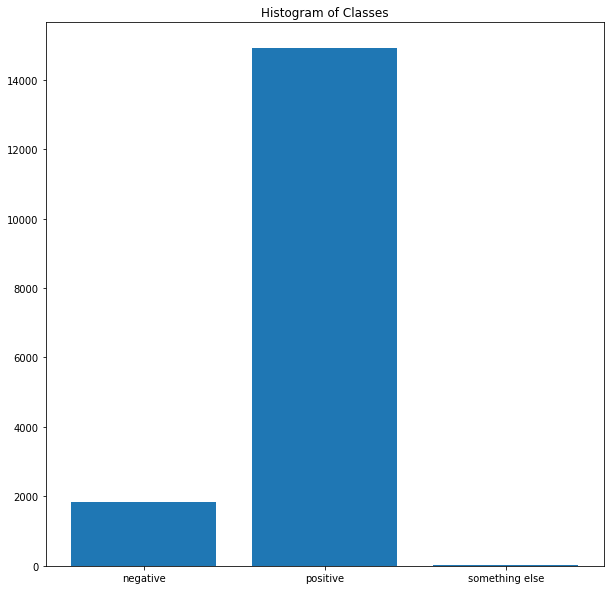

In [9]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,4), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [14]:
dfemo=dfemo[dfemo.emotype!="something else"].reset_index()
dfemo = dfemo.drop('index', axis=1)
dfemo

,level_0,art_style,painting,emotype,path
0,0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
2,2,Abstract_Expressionism,alexander-calder_the-dog,positive,dataset\wikiart\Abstract_Expressionism\alexander-calder_the-dog.jpg
3,3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_abstract-composition-1969-1.jpg
4,4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_lord-of-the-rainbow-1976.jpg
...,...,...,...,...,...
16739,16739,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg
16740,16740,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
16741,16741,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg
16742,16742,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara.jpg


In [16]:
dfemo['path']= dfemo.apply(lambda x: 'dataset\\wikiart\\'+x['art_style']+"\\"+ x['painting']+".jpg", axis=1)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
2,Abstract_Expressionism,alexander-calder_the-dog,positive,dataset\wikiart\Abstract_Expressionism\alexander-calder_the-dog.jpg
3,Abstract_Expressionism,alice-baber_abstract-composition-1969-1,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_abstract-composition-1969-1.jpg
4,Abstract_Expressionism,alice-baber_lord-of-the-rainbow-1976,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_lord-of-the-rainbow-1976.jpg
...,...,...,...,...
16739,Ukiyo_e,utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_segawa-kikunojo-v-as-onnagata.jpg
16740,Ukiyo_e,utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_sumo-wrester-in-blue-brown-striped-underkimono.jpg
16741,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg
16742,Ukiyo_e,utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_wild-geese-at-miho-kiyomi-temple-suruga-yoshiwara.jpg


In [20]:
dfemo = dfemo.drop(dfemo[dfemo['emotype'] == "positive"].sample(frac=.86).index)
dfemo

,art_style,painting,emotype,path
0,Abstract_Expressionism,aaron-siskind_yuchitan-1-1955,negative,dataset\wikiart\Abstract_Expressionism\aaron-siskind_yuchitan-1-1955.jpg
1,Abstract_Expressionism,aki-kuroda_conti-nuit-1979,negative,dataset\wikiart\Abstract_Expressionism\aki-kuroda_conti-nuit-1979.jpg
7,Abstract_Expressionism,alice-baber_wheel-of-day-1971,positive,dataset\wikiart\Abstract_Expressionism\alice-baber_wheel-of-day-1971.jpg
11,Abstract_Expressionism,atsuko-tanaka_93e-1993,negative,dataset\wikiart\Abstract_Expressionism\atsuko-tanaka_93e-1993.jpg
13,Abstract_Expressionism,atsuko-tanaka_untitled-1999,positive,dataset\wikiart\Abstract_Expressionism\atsuko-tanaka_untitled-1999.jpg
...,...,...,...,...
16714,Ukiyo_e,utagawa-kuniyoshi_the-hundred-and-eight-heroes-of-the-popular-suikoden-1,negative,dataset\wikiart\Ukiyo_e\utagawa-kuniyoshi_the-hundred-and-eight-heroes-of-the-popular-suikoden-1.jpg
16735,Ukiyo_e,utagawa-sadatora_hinaogi-of-the-daikokuya,positive,dataset\wikiart\Ukiyo_e\utagawa-sadatora_hinaogi-of-the-daikokuya.jpg
16736,Ukiyo_e,utagawa-sadatora_woman-under-flowering-tree,positive,dataset\wikiart\Ukiyo_e\utagawa-sadatora_woman-under-flowering-tree.jpg
16741,Ukiyo_e,utagawa-toyokuni-ii_view-of-oshima-from-atami-beach,positive,dataset\wikiart\Ukiyo_e\utagawa-toyokuni-ii_view-of-oshima-from-atami-beach.jpg


In [ ]:
for i in dfemo.path:
    try:
        im=Image.open(i)
    except:
        dfemo=dfemo.drop(dfemo[dfemo.path==i].index)
dfemo

In [ ]:
dfemo['emotype']= dfemo.apply(emtype,axis=1)
dfemo

In [23]:
imageDB=DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_x=ColReader('path'),
                  get_y=ColReader('emotype'),
                  item_tfms=Resize(224,ResizeMethod.Pad, PadMode.Zeros))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


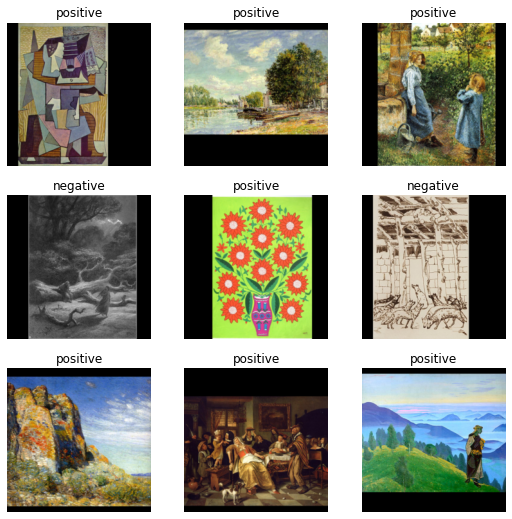

In [24]:
dls = imageDB.dataloaders(dfemo,bs=16)
dls.show_batch()

In [39]:
opt_func = partial(ranger)
model=xresnet34_deeper
learn = vision_learner(dls, model,pretrained=False, metrics=error_rate,opt_func=opt_func)

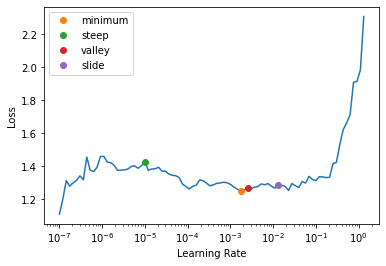

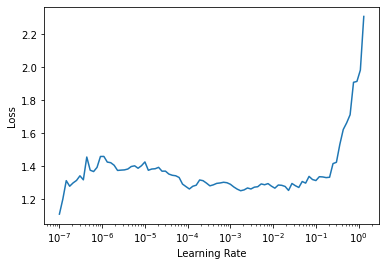

In [40]:
lr=learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
learn.recorder.plot_lr_find()

In [41]:
lr=lr[2]

In [42]:
learn.fit_flat_cos(30,lr,pct_start=0.75, cbs=[SaveModelCallback (monitor='valid_loss', 
                                                                  comp=None, 
                                                                  min_delta=0.0,
                                                                  fname='classification_model_xresnet34_deeper_refined_beforemode_balanced_binary', 
                                                                  every_epoch=False,
                                                                  at_end=False,
                                                                  with_opt=False, 
                                                                  reset_on_fit=True)])

epoch,train_loss,valid_loss,error_rate,time
0,0.892571,0.854396,0.360969,02:01
1,0.767210,0.614162,0.335459,02:01
2,0.649916,0.555209,0.290816,02:00
3,0.604256,0.713987,0.378827,01:59
4,0.623687,0.549477,0.281888,01:58
5,0.578915,0.524968,0.279337,01:58
6,0.558001,0.520206,0.266582,01:58
7,0.564843,0.539734,0.265306,01:58
8,0.544981,0.526909,0.262755,01:59
9,0.542472,0.517271,0.267857,01:58


Better model found at epoch 0 with valid_loss value: 0.8543963432312012.
Better model found at epoch 1 with valid_loss value: 0.6141618490219116.
Better model found at epoch 2 with valid_loss value: 0.5552092790603638.
Better model found at epoch 4 with valid_loss value: 0.5494768619537354.
Better model found at epoch 5 with valid_loss value: 0.5249677896499634.
Better model found at epoch 6 with valid_loss value: 0.5202058553695679.
Better model found at epoch 9 with valid_loss value: 0.5172706246376038.
Better model found at epoch 10 with valid_loss value: 0.49387919902801514.
Better model found at epoch 22 with valid_loss value: 0.49268874526023865.
Better model found at epoch 24 with valid_loss value: 0.4891726076602936.


In [43]:
model=learn.load('classification_model_xresnet34_deeper_refined_beforemode_balanced_binary')

C:\Users\Aren\anaconda3\envs\cupy\lib\site-packages\fastai\learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [ ]:
p=model.get_preds(with_input=True)

In [ ]:
len(p[2])

In [ ]:
p[1]

In [ ]:
for i,j in zip(p[1],p[2]):
    print("pred: "+str(torch.argmax(i).item())+' target: '+str(j.item()))

In [44]:
interp=ClassificationInterpretation(model,dls.valid,model.loss_func)

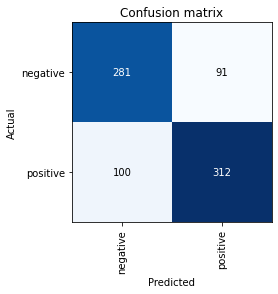

In [45]:
interp.plot_confusion_matrix()

In [46]:
interp.print_classification_report()

              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       372
    positive       0.77      0.76      0.77       412

    accuracy                           0.76       784
   macro avg       0.76      0.76      0.76       784
weighted avg       0.76      0.76      0.76       784



Text(0.5, 1.0, 'Histogram of Classes')

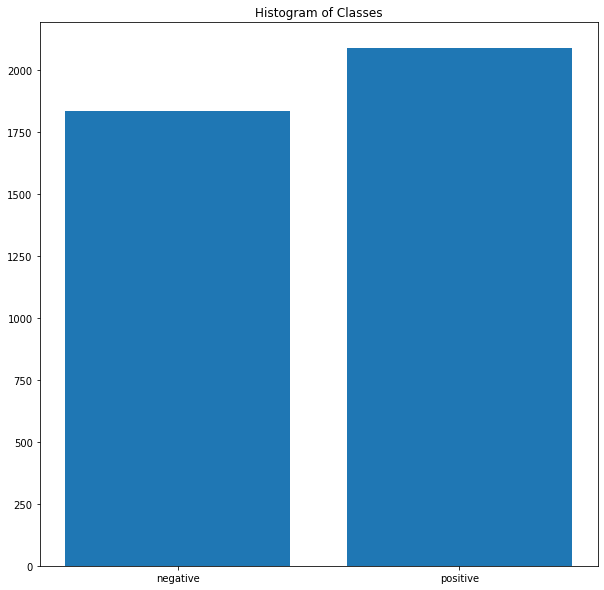

In [22]:
plt.figure(figsize=(10,10))
plt.hist(dfemo.emotype,bins=range(0,3), rwidth=0.8,align="left")
plt.title('Histogram of Classes')

In [18]:
dfemo.emotype.value_counts()

positive    14911
negative     1833
Name: emotype, dtype: int64

In [19]:
2000/14911

0.1341291663872309